<a href="https://colab.research.google.com/github/Bhupinder-2004/CODINGSAMURAI/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

df = pd.read_csv('/content/vgsales.csv')
print(df.head())
print(df.info())
print(df.describe())


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------  

In [13]:

print(" Variance of Sales Columns:")
print(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].var())
print("\n")

print(" Correlation between Sales Columns:")
print(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr())
print("\n")

print(" Missing Values per Column:")
print(df.isnull().sum())
print("\n")


 Variance of Sales Columns:
NA_Sales        0.666971
EU_Sales        0.255380
JP_Sales        0.095661
Other_Sales     0.035566
Global_Sales    2.418112
dtype: float64


 Correlation between Sales Columns:
              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
NA_Sales      1.000000  0.767727  0.449787     0.634737      0.941047
EU_Sales      0.767727  1.000000  0.435584     0.726385      0.902836
JP_Sales      0.449787  0.435584  1.000000     0.290186      0.611816
Other_Sales   0.634737  0.726385  0.290186     1.000000      0.748331
Global_Sales  0.941047  0.902836  0.611816     0.748331      1.000000


 Missing Values per Column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64




In [14]:
# Average Global Sales
print(" Average Global Sales (in millions):")
print(df['Global_Sales'].mean())
print("\n")

# Most Common Genre
print(" Count of Games by Genre:")
print(df['Genre'].value_counts())
print("\n")

# Platform Popularity
print(" Number of Games Released per Platform:")
print(df['Platform'].value_counts())
print("\n")

# Top 5 Publishers by Total Global Sales
print(" Top 5 Publishers by Global Sales:")
print(df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5))


 Average Global Sales (in millions):
0.5374406555006628


 Count of Games by Genre:
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64


 Number of Games Released per Platform:
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


 Top 5 Publishers by Global Sales:
Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                 

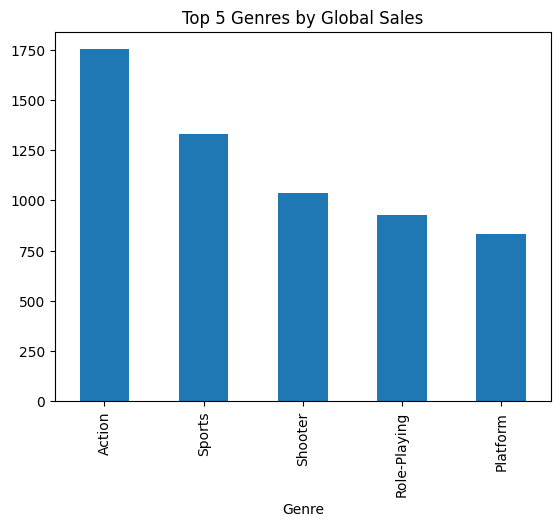

In [10]:
import matplotlib.pyplot as plt
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(5)
genre_sales.plot(kind='bar', title='Top 5 Genres by Global Sales')
plt.show()


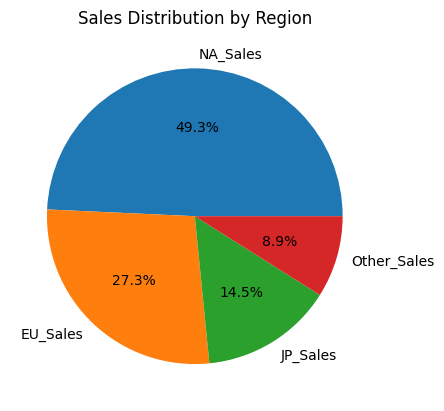

In [11]:
region_sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Region')
plt.show()


In [12]:
import pandas as pd
import plotly.express as px

data = {
    'Region': ['United States', 'Germany', 'Japan', 'Australia'],  # representative countries
    'Sales': df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().values
}
region_df = pd.DataFrame(data)

fig = px.choropleth(
    region_df,
    locations='Region',
    locationmode='country names',
    color='Sales',
    title='Video Game Sales by Region (Approximation)'
)
fig.show()
